In [1]:
# Загружаем библиотеки
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [2]:
# загрузка данных
phones = pd.read_csv('phones.csv')
phones.head(8)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013


Отобразим в графическом виде

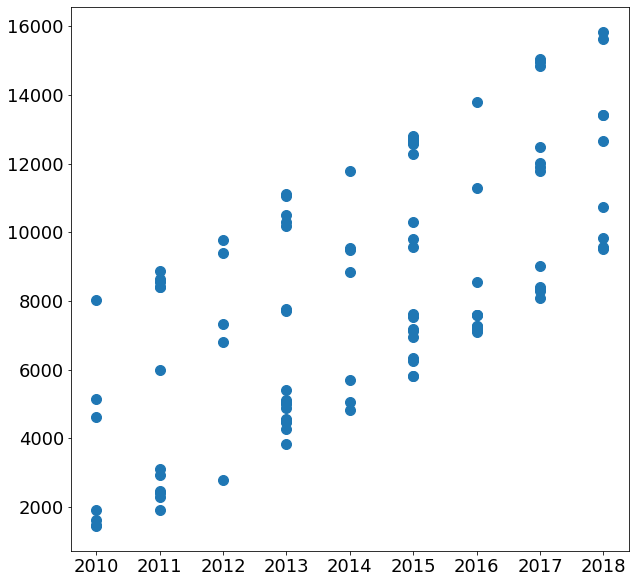

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)

plt.show()

Выгрузим признаки и целевые значения в  отдельные переменные и создадим регрессор

In [4]:
X = phones[["year"]]
y = phones["price"]

reg = LinearRegression().fit(X, y)

Создадим функцию, которая вытащит расчеты предсказания

In [5]:
[b] = reg.coef_
a = reg.intercept_

def reg_prediction(year):
    return a + b * year

reg_prediction(X.year[2])

4016.45917081018

Используем встроенный метод для расчета предсказаний

In [6]:
reg.predict(X[0:3])[2]

4016.45917081018

Отобразим предсказания на графике

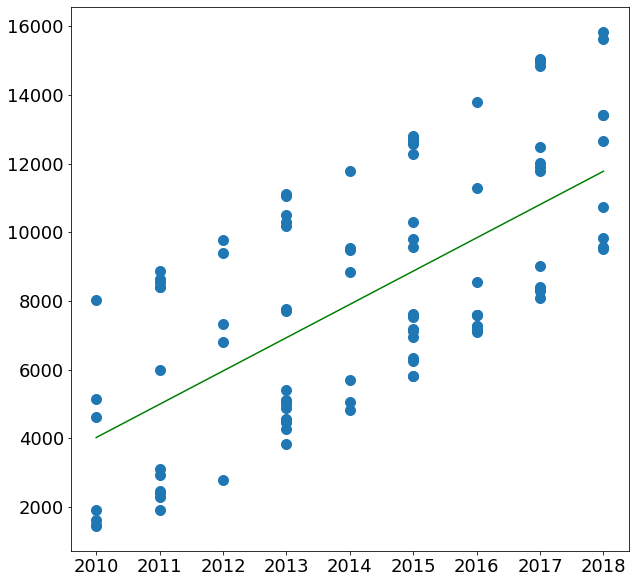

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="green")

plt.show()

Далее создадим классификацию. В основу возьмем операционную систему.

Выгрузим признаки и создадим классификатор

[Text(0.5, 0.875, 'X[1] <= 7660.5\ngini = 0.498\nsamples = 100\nvalue = [53, 47]'),
 Text(0.3, 0.625, 'X[0] <= 2012.5\ngini = 0.187\nsamples = 48\nvalue = [43, 5]'),
 Text(0.2, 0.375, 'X[1] <= 3855.5\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.7, 0.625, 'X[0] <= 2015.5\ngini = 0.311\nsamples = 52\nvalue = [10, 42]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.8, 0.375, 'X[1] <= 11017.0\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]')]

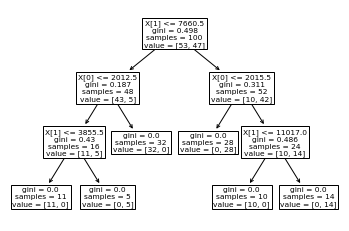

In [8]:
X = phones[["year", "price"]]
y = phones["os"]

cl = tree.DecisionTreeClassifier().fit(X, y)

#print(export_text(cl))

tree.plot_tree(cl)

Проверяем

In [9]:
cl.predict(X[5:8])[0], y[5]

('iOS', 'iOS')

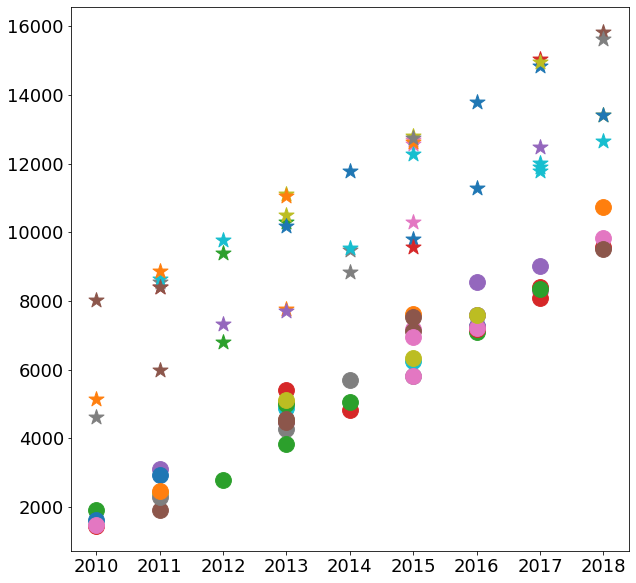

In [10]:
fig = plt.figure(figsize=(10, 10))

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.show()

Создадим кластеризацию

In [11]:
X = phones[["year", "price"]]

clust = KMeans(n_clusters=2).fit(X)

Посмотрим центры кластеров

In [12]:
[c1, c2] = clust.cluster_centers_

In [13]:
clust.cluster_centers_

array([[ 2015.525     , 11601.65      ],
       [ 2013.35      ,  5784.78333333]])

Отобразим графически

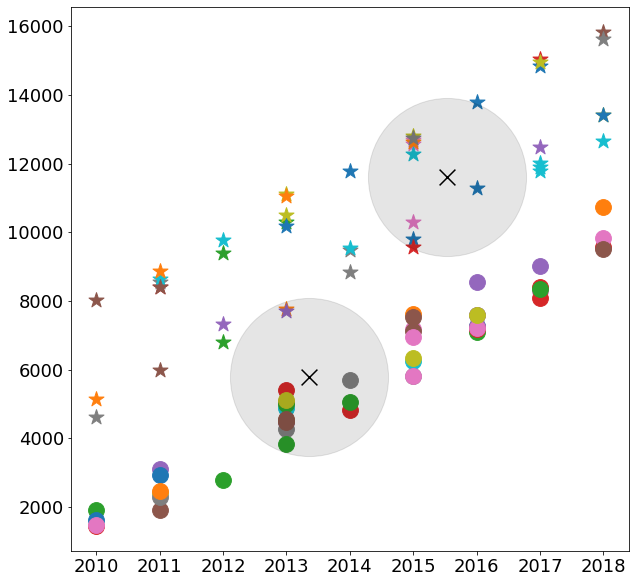

In [14]:
fig = plt.figure(figsize=(10, 10))

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.show()